In [1]:
!pip install -q transformers

     |████████████████████████████████| 3.4 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 42.3 MB/s 
     |████████████████████████████████| 3.3 MB 42.6 MB/s 
     |████████████████████████████████| 596 kB 43.0 MB/s 
     |████████████████████████████████| 61 kB 394 kB/s 


In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [63]:
youtube_video = "https://www.youtube.com/watch?v=GjNp0bBrjmU"

In [64]:
video_id = youtube_video.split("=")[1]

In [65]:
video_id

'GjNp0bBrjmU'

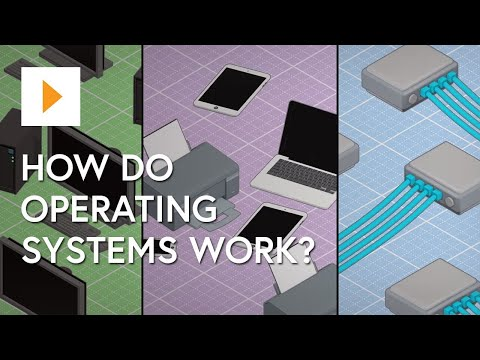

In [66]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [67]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [68]:
transcript[0:5]

[{'duration': 13.95, 'start': 4.23, 'text': '[Music]'},
 {'duration': 12.18,
  'start': 18.49,
  'text': 'computers are used for so many different'},
 {'duration': 13.83,
  'start': 22.46,
  'text': 'tasks playing games watching videos'},
 {'duration': 10.36,
  'start': 30.67,
  'text': 'running calculations communicating and'},
 {'duration': 7.5,
  'start': 36.29,
  'text': 'collaborating computers today are a'}]

In [69]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

2155


In [70]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


In [71]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 [Music] computers are used for so many different tasks playing games watching videos running calculations communicating and collaborating computers today are a mixture of different types of hardware and software but there is one program that brings them all together and that's the operating system to consider what the operating system is let's go back in time to the invention of digital computers they could handle around 5,000 complex calculations per second impressive for the time but today's supercomputers perform nearly 34 trillion calculations per second programs were written on punch cards pieces of cardboard with holes these were fed one at a time into the central processing unit or CPU and enabled the earliest form of computer batch processing in some cases one person was in charge of making sure the cards were fed in correctly their job was to correct jams and schedule when the next program could be run as computers became faster they were able to process punch car

Your max_length is set to 142, but you input_length is only 29. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Summarized text
 Programmers had to write very different types of programs specific to the machine it would be running on was it this card or that card? The solution was to write a brilliant piece of software called an operating system or OS . OS is one of the first programs that runs when a computer is turned on most programs start the same way .
input text 
 the collection of all the common commands and segments them rather like putting them into a library from which the other regular programs can borrow codes
Summarized text
 The collection of all the common commands and segments them into a library from which the other regular programs can borrow codes . The library is like a library of codes from which regular programs are able to borrow codes from other programs, such as regular programs, can borrow code from the library .


In [72]:
len(str(summarized_text))

983

In [73]:
str(summarized_text)

'[" Digital computers are used for so many different tasks playing games watching videos and running calculations . Today\'s supercomputers perform nearly 34 trillion calculations per second . Programs were written on punch cards pieces of cardboard with holes . One person was in charge of making sure the cards were fed in correctly .", \' Programmers had to write very different types of programs specific to the machine it would be running on was it this card or that card? The solution was to write a brilliant piece of software called an operating system or OS . OS is one of the first programs that runs when a computer is turned on most programs start the same way .\', \' The collection of all the common commands and segments them into a library from which the other regular programs can borrow codes . The library is like a library of codes from which regular programs are able to borrow codes from other programs, such as regular programs, can borrow code from the library .\']'